In [1]:
#Import all the required basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Helps in creating better graphics and visualization
plt.style.use('ggplot')

#Natural language toolkit, used for text analysis, including tokenization, stemming, tagging, parsing, and machine learning for linguistic tasks
import nltk

In [3]:
#To load the file into a dataframe df
df = pd.read_csv('Document/Reviews.csv')

In [4]:
# Check the top 5 lines of your data just for an idea on how your data looks
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# This command gives general idea on the columns an if it contains any null values and their data types
print(df.info())

#There are only 2 columns ProfileName and Summary which has null values
#The data has 5 object datatypes and 4 int datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [6]:
#To check the exact count of null values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
# This gives the maz,min and quartiles of the numeric data. You can observe where the most of the values lie
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
# We are only considering the required colums for our analysis and renaming them for better understanding

df = df[['Text', 'Score']]

df.rename(columns={'Text': 'review_text', 'Score': 'score'}, inplace=True)

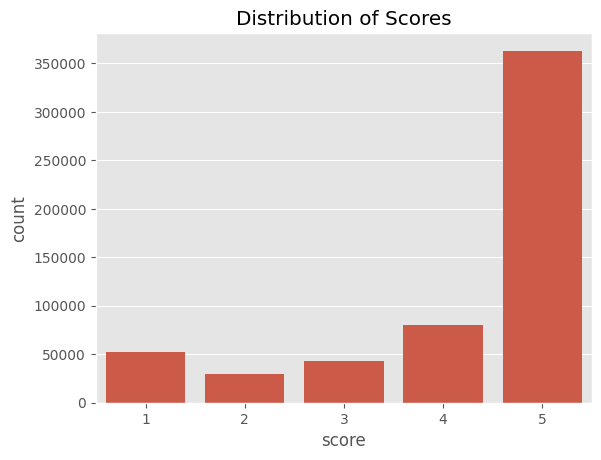

In [23]:
# EDA: Distribution of Scores
sns.countplot(x='score', data=df)
plt.title('Distribution of Scores')
plt.show()

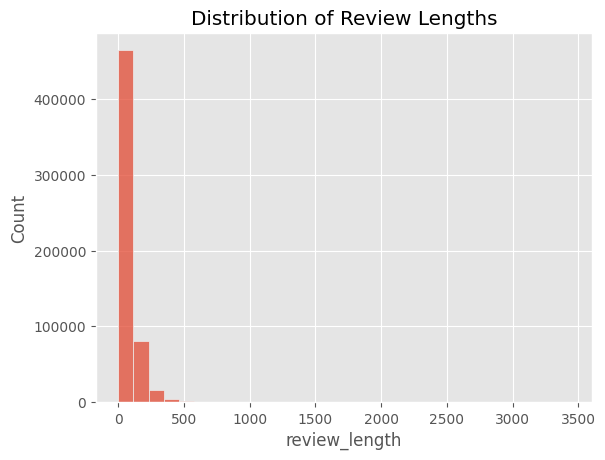

In [9]:
# Review Length Distribution
df['review_length'] = df['review_text'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.show()

In [10]:
# Define a function to map scores to sentiment labels
def map_sentiment(score):
    if score >= 4:
        return 1  # Positive
    elif score == 3:
        return 0  # Neutral
    else:
        return -1  # Negative


In [11]:
# Apply function to create a new sentiment column
df['sentiment'] = df['score'].apply(map_sentiment)

In [12]:
# Confirm changes
print(df['sentiment'].value_counts())

sentiment
 1    443777
-1     82037
 0     42640
Name: count, dtype: int64


In [13]:
# HERE re IS REGEXP and then we imported stopwords and wordnetlemmatizer
# stopwords - common words (like "the," "a," "is") are removed as they dont carry any meaning
# wordnetlemmatizer - lemmatizers reduce the words to its basic or dictionary form - ex:  (e.g., "running," "runs," "ran") -> run


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Manasa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Manasa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Manasa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
#Check the sample output of stop_words
print(list(stop_words)[:3])

["wouldn't", "i'll", 'for']


In [20]:
#These are the entries present in the column review_text
df['review_text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: review_text, dtype: object

In [22]:
# Function for text cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters & numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

In [23]:
# Apply text cleaning
df['cleaned_text'] = df['review_text'].apply(clean_text)

In [24]:
# Check cleaned text
print(df[['cleaned_text']].head())

                                        cleaned_text
0  bought several vitality canned dog food produc...
1  product arrived labeled jumbo salted peanutsth...
2  confection around century light pillowy citrus...
3  looking secret ingredient robitussin believe f...
4  great taffy great price wide assortment yummy ...


In [25]:
#Word2Vec model allows words to be represented as vectors in a continuous vector space. 
from gensim.models import Word2Vec

In [26]:
# Tokenize sentences
sentences = [text.split() for text in df['cleaned_text']]

In [27]:
# Word2Vec model
#vector_size means we are defining the dimensionality. Higher dimensions can capture more complex relationships but might need more data and training time.
# window_size -  5 means it looks at 5 words to the left and right.
# min_count - Ignores words that appear less than 5 times in the dataset.
# workers - no of parallel threads to use 
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [42]:
# Function to get the average Word2Vec vector for a review
def get_review_vector(review, model, vector_size):
    # Split the review into individual words
    words = review.split()
    
    # Get the vector for each word in the review if it exists in the model's vocabulary
    vectors = [model.wv[word] for word in words if word in model.wv]
    
    # Handle the case where no words in the review are found in the vocabulary
    if len(vectors) == 0:
        return np.zeros(vector_size)  # Return a zero vector of the specified size
    
    # Return the average (mean) of all the word vectors
    return np.mean(vectors, axis=0)

In [30]:
# Apply function to each review
df['review_vector'] = df['cleaned_text'].apply(lambda x: get_review_vector(x, word2vec_model, 100))

In [31]:
df['review_vector'].head()

0    [-0.8425916, 0.0614122, -0.82788783, 1.2485027...
1    [-0.6128124, -0.4300421, -0.12612483, 0.639044...
2    [-0.15901881, -0.020003973, -0.012498922, 0.22...
3    [0.032308407, 0.41221148, -0.32745948, 1.05066...
4    [0.35893983, 0.067785494, 0.46236122, 0.268883...
Name: review_vector, dtype: object

In [34]:
# Convert list of arrays into a NumPy array
X = np.vstack(df['review_vector'].values)
y = df['sentiment']

In [35]:
# train_test_split - splits the data into train test split
# Implements Logistic Regression, a popular linear model for binary classification (0 or 1). It predicts the probability that a given input belongs to a particular class.
# accuracy_score: Measures the overall accuracy of the model (percentage of correct predictions).
# classification_report: Provides detailed metrics like precision, recall, F1-score, and support for each class.
# confusion_matrix : Shows how many predictions were correct or incorrect for each class.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train a logistic regression classifier
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [39]:
# Predict on test data
y_pred = clf.predict(X_test)

In [40]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.84


In [41]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.68      0.58      0.63     16181
           0       0.39      0.05      0.09      8485
           1       0.87      0.97      0.92     89025

    accuracy                           0.84    113691
   macro avg       0.65      0.53      0.55    113691
weighted avg       0.81      0.84      0.81    113691



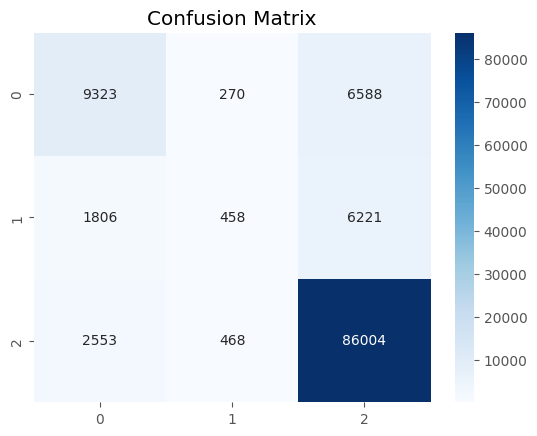

In [53]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()